# Figure 2: Intersection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
df = pd.read_csv('../outputs/fig2c_20000samples.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,5.379313,5.019890,3.256350,7.137635,10.605374,2.851950,40,8,5,50,30.0,0.0,0.52,G,NaN,True
1,0,7.375292,6.643824,4.218760,9.711184,15.346991,4.290830,40,40,1,50,30.0,0.0,0.36,G,NaN,False
2,0,2.958618,2.752207,1.774162,3.936022,5.878363,1.597515,40,40,1,50,30.0,0.0,0.02,G,NaN,False
3,0,10.745256,9.576898,6.021911,14.149884,22.827837,6.490554,40,40,1,50,30.0,0.0,0.50,G,NaN,False
4,0,4.741156,4.463213,2.839764,6.289516,9.315424,2.500368,40,8,5,50,30.0,0.0,0.00,G,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,4.017481,3.713536,2.379718,5.354330,8.074778,2.197198,40,40,1,50,30.0,0.0,0.12,G,NaN,False
58,0,6.393598,5.841472,3.720894,8.433402,13.137185,3.621199,40,40,1,50,30.0,0.0,0.30,G,NaN,False
59,0,14.626240,12.765825,7.938976,19.037486,32.205676,9.442613,40,40,1,50,30.0,0.0,0.60,G,NaN,False
60,0,5.150654,4.829007,3.123012,6.843455,10.106266,2.704473,40,8,5,50,30.0,0.0,0.42,G,NaN,True


In [42]:
df1 = df[df.k==1].sort_values(by="outlier_rate")
df5 = df[df.k==5].sort_values(by="outlier_rate")

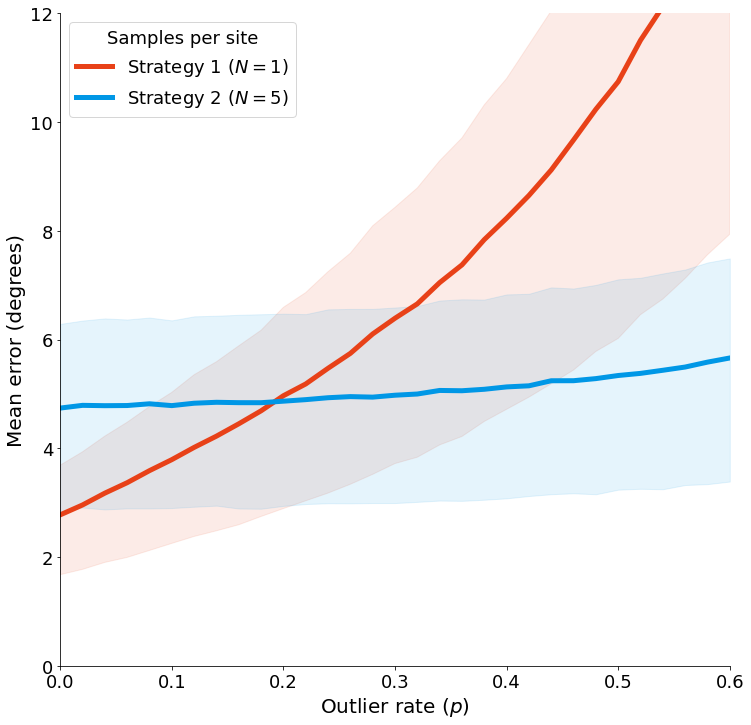

In [44]:
fig, ax = plt.subplots(figsize=(12,12))

sns.lineplot(ax=ax, data=df, x="outlier_rate", y="error_angle_mean", hue="k", lw=5, palette=["#e84118", "#0097e6"])
# sns.lineplot(ax=ax, data=df, x="outlier_rate", y="error_angle_95", hue="k", lw=2, palette=["#e84118", "#0097e6"], linestyle="dashdot")

plt.fill_between(df1.outlier_rate, df1.error_angle_25, df1.error_angle_75, color="#e84118", alpha=0.1)
plt.fill_between(df5.outlier_rate, df5.error_angle_25, df5.error_angle_75, color="#0097e6", alpha=0.1)


plt.plot

plt.xlabel("Outlier rate ($p$)", fontsize=20)
plt.ylabel("Mean error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(np.arange(0, 0.70, 0.1), fontsize=18)
plt.xlim(0, 0.6)
plt.ylim(0, 12)
plt.legend(title="Samples per site", loc="upper left", fontsize=18, title_fontsize=18, labels=["Strategy 1 ($N=1$)", "Strategy 2 ($N=5$)"])
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("Figure3c.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3c.png", format="png", bbox_inches='tight')

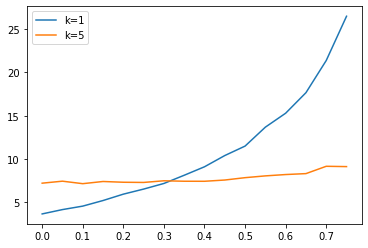

In [8]:
out_rate = df1.outlier_rate
error_1 = df1.error_angle_mean.values
error_5 = df5.error_angle_mean.values

plt.plot(out_rate, error_1, label="k=1")
plt.plot(out_rate, error_5, label="k=5")
plt.legend()

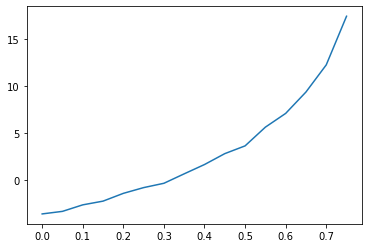

In [9]:
plt.plot(out_rate, error_1 - error_5, label="diff")

In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [11]:
InterpolatedUnivariateSpline(out_rate, error_1-error_5).roots()

array([0.31748255])

In [12]:
outlier_rate = 0.1
df1 = df[(df.k==1) & (df.ignore_outliers==False) & (df.outlier_rate==outlier_rate)]
df5 = df[(df.k==5) & (df.ignore_outliers==True) & (df.outlier_rate==outlier_rate)]

# Filter 90 because those results look a little bit off
df1 = df1[df1.site_lat < 85]
df5 = df5[df5.site_lat < 85]
df5

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
54,0,5.095796,4.788230,9.980880,2.795028,50,10,5,10,20,0.0,0.1,G,NaN,True
107,0,8.230897,7.725080,15.990956,4.336672,50,10,5,10,60,0.0,0.1,G,NaN,True
114,0,6.766465,6.310283,13.437326,3.605920,50,10,5,60,70,0.0,0.1,G,NaN,True
137,0,7.869661,7.459712,15.373931,4.067523,50,10,5,30,80,0.0,0.1,G,NaN,True
138,0,7.099442,6.884070,13.630097,3.676414,50,10,5,100,80,0.0,0.1,G,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,0,9.461147,9.022862,18.420046,4.882024,50,10,5,10,80,0.0,0.1,G,NaN,True
2773,0,6.408434,6.095535,12.889362,3.387321,50,10,5,100,70,0.0,0.1,G,NaN,True
2775,0,5.580258,5.249040,10.765833,2.882189,50,10,5,20,40,0.0,0.1,G,NaN,True
2813,0,4.156173,3.906500,8.348994,2.273472,50,10,5,60,30,0.0,0.1,G,NaN,True


In [13]:
df1_tab = df1.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')
df5_tab = df5.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')

df_diff = df5_tab - df1_tab
df_diff = df_diff / df5_tab
df_diff

site_lat,0,10,20,30,40,50,60,70,80
kappa_within_site,,,,,,,,,
10,0.050232,0.072395,0.065189,0.073582,0.013611,0.100029,0.136424,0.188970,0.184899
20,0.140933,0.108194,0.118008,0.137200,0.159756,0.162810,0.193738,0.229960,0.239568
30,0.171865,0.184737,0.149650,0.173746,0.202616,0.231238,0.247840,0.248996,0.296639
40,0.139358,0.167174,0.193903,0.211961,0.196130,0.248737,0.272084,0.302720,0.319767
50,0.203592,0.149222,0.206914,0.205934,0.259353,0.268312,0.295471,0.303520,0.341888
60,0.166593,0.172312,0.190438,0.226144,0.238319,0.257383,0.298722,0.325649,0.310940
70,0.189813,0.187705,0.249427,0.234895,0.250281,0.249834,0.286900,0.354348,0.356893
80,0.222032,0.219560,0.245391,0.206648,0.238555,0.279176,0.307240,0.321186,0.365813
90,0.232618,0.237666,0.257209,0.255205,0.254619,0.272489,0.302441,0.326596,0.364308


In [14]:
from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_, a_max=15):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    Z_smooth = gaussian_filter(Z, 1.0)
    
    Z_rounded = np.round(Z, 2)
    
    x,y = np.meshgrid(X, Y)

    bounds = np.arange(-0.5, 0.5, .1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    # ax.set_aspect("equal")
    
    ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap="seismic_r", alpha=0.8, vmin=-.5, vmax=.5)
    # CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(0.0, 16.0, 1.0))
    ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)
    # CS2 = ax.pcolormesh(x, y, Z, cmap='viridis', alpha=0.8)
    
    ax.clabel(ContourLines, inline=True, fontsize=14)
    ax.set_xticks(df_.columns.values)
    ax.set_yticks(df_.index.values)
    ax.set_yscale("log")
    # ax.set_xlim([0, np.max(df_.columns.values)])
    # ax.set_ylim([0, np.max(df_.index.values)])
    ax.set_xlabel('Paleolatude')
    ax.set_ylabel('Kappa')
    cbar = plt.colorbar(ColorGrid, boundaries=bounds, fraction=0.02, location='right')
    cbar.set_label("Difference between means squared error", rotation=270)
     
    # plt.savefig("Figure1.png", dpi=300, format="png")

/tmp/ipykernel_735/1172950600.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


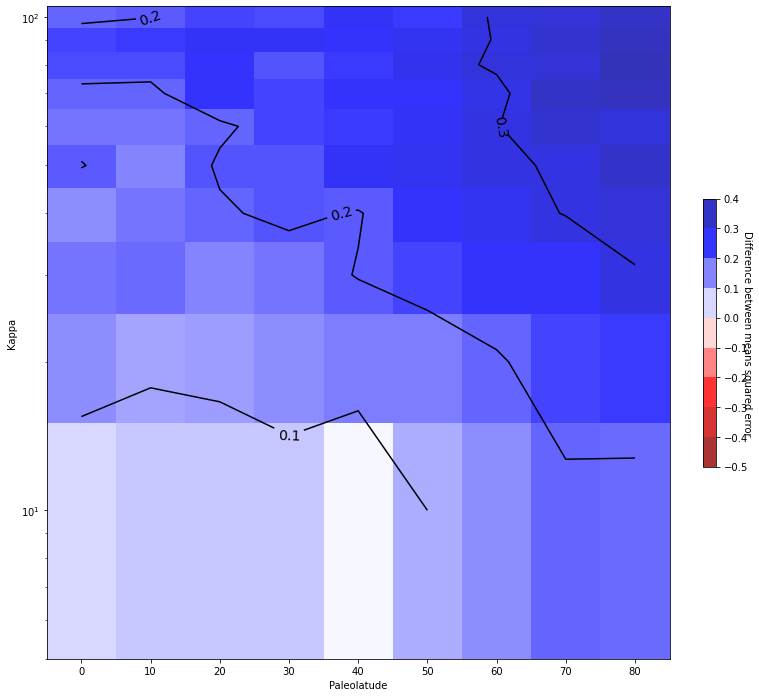

In [15]:
contour_from_pandas(df_diff)